In [2]:
print("Name - Duleshwar Kumar Verma")
print("Roll No. - 18115027")

#Load Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

from pandas.plotting import scatter_matrix

Name - Duleshwar Kumar Verma
Roll No. - 18115027


In [2]:
# load dataset
df = pd.read_csv("Detection.csv")

In [3]:
#shape
print(df.shape)
print(df.columns)

(6995, 6)
Index(['Computer Time', 'Time (Milli Sec.)', 'GSR', 'BPM', 'Temperature',
       'EMOTIONAL AFFIRM'],
      dtype='object')


In [4]:
#Checking for Null(NaN) values
df.isnull().sum()

Computer Time        13
Time (Milli Sec.)    13
GSR                  13
BPM                  13
Temperature          13
EMOTIONAL AFFIRM     13
dtype: int64

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

Computer Time        0
Time (Milli Sec.)    0
GSR                  0
BPM                  0
Temperature          0
EMOTIONAL AFFIRM     0
dtype: int64

In [6]:
#types
print(df.dtypes)

Computer Time         object
Time (Milli Sec.)    float64
GSR                  float64
BPM                  float64
Temperature          float64
EMOTIONAL AFFIRM      object
dtype: object


In [7]:
#head
df.head()

,Computer Time,Time (Milli Sec.),GSR,BPM,Temperature,EMOTIONAL AFFIRM
0,23:17:28,612253.0,343.0,110.0,37.11,HAPPY
1,22:55:53,434116.0,544.0,120.0,28.81,HAPPY
2,23:18:54,697949.0,341.0,104.0,25.88,HAPPY
3,22:40:08,279136.0,497.0,94.0,25.88,HAPPY
4,22:56:00,441222.0,545.0,115.0,24.90,HAPPY


In [8]:
df['EMOTIONAL AFFIRM'].unique()

array(['HAPPY', 'SAD', 'RELAXED', 'ANGRY'], dtype=object)

C:\Users\Duleshwar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


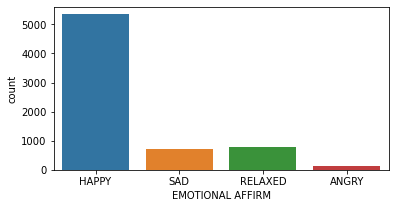

In [9]:
plt.figure(figsize = (6,3))
sns.countplot(df['EMOTIONAL AFFIRM'])
plt.show()

In [10]:
df['EMOTIONAL AFFIRM'].value_counts()

HAPPY      5339
RELAXED     782
SAD         724
ANGRY       137
Name: EMOTIONAL AFFIRM, dtype: int64

In [11]:
df.isnull().sum() #no missing values

Computer Time        0
Time (Milli Sec.)    0
GSR                  0
BPM                  0
Temperature          0
EMOTIONAL AFFIRM     0
dtype: int64

In [12]:
#split into features and labels sets
#X = df.drop(['Computer Time','EMOTIONAL AFFIRM'],axis = 1) #features
#y = df['EMOTIONAL AFFIRM'] #labels

In [13]:
label_mapping = {'RELAXED': 0, 'SAD': 1, 'HAPPY': 2,'ANGRY' : 3}

In [14]:
def preprocess_inputs(df):
    df = df.copy()
    
    df['EMOTIONAL AFFIRM'] = df['EMOTIONAL AFFIRM'].replace(label_mapping)
    
    y = df['EMOTIONAL AFFIRM'].copy()
    X = df.drop(['Computer Time','EMOTIONAL AFFIRM'],axis = 1).copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    return X_train, X_test, y_train, y_test


In [15]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)

In [16]:
X_train

,Time (Milli Sec.),GSR,BPM,Temperature
4466,422933.0,546.0,114.0,33.69
2408,313997.0,532.0,101.0,20.02
6065,519535.0,349.0,99.0,35.16
2763,378392.0,585.0,80.0,24.41
3816,952453.0,348.0,110.0,23.44
...,...,...,...,...
5225,185270.0,506.0,92.0,19.04
4066,36079.0,488.0,84.0,23.44
1348,247444.0,496.0,72.0,20.02
3460,384521.0,546.0,94.0,23.44


In [17]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [18]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)

gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)

flatten = tf.keras.layers.Flatten()(gru)

outputs = tf.keras.layers.Dense(4, activation='softmax')(flatten)


model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 tf.expand_dims (TFOpLambda)  (None, 4, 1)             0         
                                                                 
 gru (GRU)                   (None, 4, 256)            198912    
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 4)                 4100      
                                                                 
Total params: 203,012
Trainable params: 203,012
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    
    
)

Epoch 1/50
123/123 [==============================] - 6s 19ms/step - loss: 0.5712 - accuracy: 0.8143 - val_loss: 0.3120 - val_accuracy: 0.9090
Epoch 2/50
123/123 [==============================] - 2s 12ms/step - loss: 0.2226 - accuracy: 0.9184 - val_loss: 0.1508 - val_accuracy: 0.9335
Epoch 3/50
123/123 [==============================] - 2s 13ms/step - loss: 0.1938 - accuracy: 0.9169 - val_loss: 0.2532 - val_accuracy: 0.8845
Epoch 4/50
123/123 [==============================] - 1s 12ms/step - loss: 0.1181 - accuracy: 0.9517 - val_loss: 0.1309 - val_accuracy: 0.9346
Epoch 5/50
123/123 [==============================] - 2s 13ms/step - loss: 0.1378 - accuracy: 0.9419 - val_loss: 0.1038 - val_accuracy: 0.9417
Epoch 6/50
123/123 [==============================] - 1s 12ms/step - loss: 0.1437 - accuracy: 0.9371 - val_loss: 0.0876 - val_accuracy: 0.9652
Epoch 7/50
123/123 [==============================] - 2s 13ms/step - loss: 0.1136 - accuracy: 0.9532 - val_loss: 0.0790 - val_accuracy: 0.9652

In [20]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 96.325%


In [21]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       247
           1       0.84      0.92      0.88       221
           2       0.98      1.00      0.99      1580
           3       1.00      0.55      0.71        47

    accuracy                           0.96      2095
   macro avg       0.95      0.83      0.87      2095
weighted avg       0.97      0.96      0.96      2095



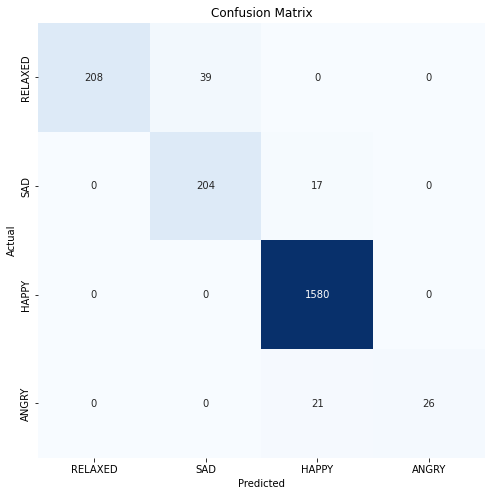

In [22]:
cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(4) + 0.5, label_mapping.keys())
plt.yticks(np.arange(4) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

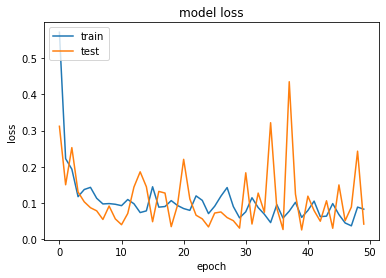

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Pictures/Loss_Model.png') 
plt.show()

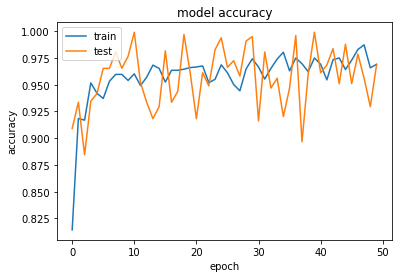

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.savefig('Pictures/Accuracy_Model.png') 
plt.show()